In [36]:
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geopy.distance import great_circle as  distance

In [37]:
def merge_lines(feature_collection):
    features = copy.deepcopy(feature_collection['features'])
    ordered_coords = [features.pop()['geometry']['coordinates']]
    while len(features) > 0:
        min_dist = 1.e6
        idx = 0
        reverse = False
        insert_idx = 0
        for i, feature in enumerate(features):
            coord_list = feature['geometry']['coordinates']
            front_feat = coord_list[0][::-1]
            back_feat = coord_list[-1][::-1]
            front_coords = ordered_coords[0][0][::-1]
            back_coords = ordered_coords[-1][-1][::-1]
            d1 = distance(front_coords, front_feat)
            d2 = distance(front_coords, back_feat)
            d3 = distance(back_coords, front_feat)
            d4 = distance(back_coords, back_feat)
            
            if d1 < min_dist:
                min_dist = d1
                idx = i
                insert_idx = 0
                reverse = True

            if d2 < min_dist:
                min_dist = d2
                idx = i
                insert_idx = 0
                reverse = False

            if d3 < min_dist:
                min_dist = d3
                idx = i
                insert_idx = len(ordered_coords)
                reverse = False

            if d4 < min_dist:
                min_dist = d4
                idx = i
                insert_idx = len(ordered_coords)
                reverse = True

        feature = features.pop(idx)
        coords = feature['geometry']['coordinates']
        coords = coords[::-1] if reverse else coords
        ordered_coords.insert(insert_idx, coords)
    return [item for sublist in ordered_coords for item in sublist]


In [48]:
data = json.load(open('shapefiles/gold.geo.json'))
c = np.array(merge_lines(data))
c.shape

(1338, 2)

In [50]:
d = np.zeros(c.shape[0])
d.shape

(1338,)

In [62]:
for i, point in enumerate(c):
    if i == 0:
        continue
    d[i] = distance(c[i-1][::-1], c[i][::-1]).km    

In [67]:
cumulative_distance = np.cumsum(d)
total_distance = cumulative_distance[-1]
total_distance

49.63789011062935

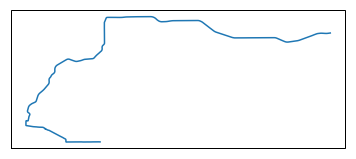

In [65]:
ax = plt.axes(projection=ccrs.Mercator())
plt.plot(c[:,0], c[:,1], transform=ccrs.PlateCarree())

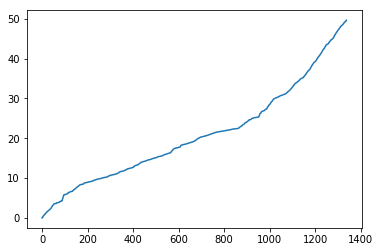

In [66]:
plt.plot(cumulative_distance)

In [126]:
def get_nearest_point_index(pt, route):
    d = np.fromiter((distance(r[::-1], pt[::-1]).km for r in route), dtype=float)
    print(np.min(d), np.argmin(d))
    return np.argmin(d)

In [69]:
import pandas as pd

/home/ian/anaconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [74]:
df = pd.read_csv('sample_tracking_data.csv')

In [90]:
df

,id,timestamp,vehicle_id,route_id,lat,lon,direction
0,1,1535266661,406,804,34.116257,-118.156545,0.0
1,2,1535266621,401,804,34.088014,-118.212430,180.0
2,3,1535266661,411,804,34.047772,-118.227849,180.0
3,4,1535266649,407,804,34.070755,-118.228575,0.0
4,5,1535266587,413,804,34.133057,-118.003055,0.0
5,6,1535266480,404,804,34.136919,-117.891003,0.0
6,7,1535266642,412,804,34.152505,-118.104240,180.0
7,8,1535266661,402,804,34.112384,-118.164327,180.0
8,9,1535266649,410,804,34.047513,-118.224150,0.0
9,10,1535266661,405,804,34.152417,-118.114348,0.0


In [112]:
cumulative_distance[get_nearest_point_index((-117.8899, 34.136975), c)]/total_distance

1.0

In [128]:
df['distance'] = df.apply(lambda x: cumulative_distance[get_nearest_point_index((x['lon'], x['lat']), c)], axis=1)

0.005024131630691973 736
0.007779234161855321 435
0.014517870112606603 148
0.0062173017986051704 338
0.007246097608207215 1194
0.05993646628629214 1335
0.01758912699383374 1006
0.014705650007987353 689
0.0044459401046380055 140
0.011930877756687247 995
0.015168776597229856 11
0.003919051002762713 4
0.005024131630691973 736
0.007779234161855321 435
0.014517870112606603 148
0.0062173017986051704 338
0.007246097608207215 1194
0.05993646628629214 1335
0.01758912699383374 1006
0.014705650007987353 689
0.0044459401046380055 140
0.011930877756687247 995
0.015168776597229856 11
0.003919051002762713 4
0.011894696179387366 894
0.005321707152646358 266
0.019564122232750805 93
0.002937991923178988 557
0.01716217986581208 1283
0.022706555668595144 1292
0.004758625498967136 906
0.012596202310576687 508
0.005769222157353855 192
0.01005188803279283 1095
0.020558658979057 62
0.011894696179387366 894
0.005321707152646358 266
0.019564122232750805 93
0.002937991923178988 557
0.01716217986581208 1283
0.022

In [129]:
df

,id,timestamp,vehicle_id,route_id,lat,lon,direction,distance
0,1,1535266661,406,804,34.116257,-118.156545,0.0,20.923223
1,2,1535266621,401,804,34.088014,-118.212430,180.0,13.940541
2,3,1535266661,411,804,34.047772,-118.227849,180.0,7.452256
3,4,1535266649,407,804,34.070755,-118.228575,0.0,11.456414
4,5,1535266587,413,804,34.133057,-118.003055,0.0,38.983527
5,6,1535266480,404,804,34.136919,-117.891003,0.0,49.477025
6,7,1535266642,412,804,34.152505,-118.104240,180.0,29.019689
7,8,1535266661,402,804,34.112384,-118.164327,180.0,20.060753
8,9,1535266649,410,804,34.047513,-118.224150,0.0,7.129006
9,10,1535266661,405,804,34.152417,-118.114348,0.0,28.095946


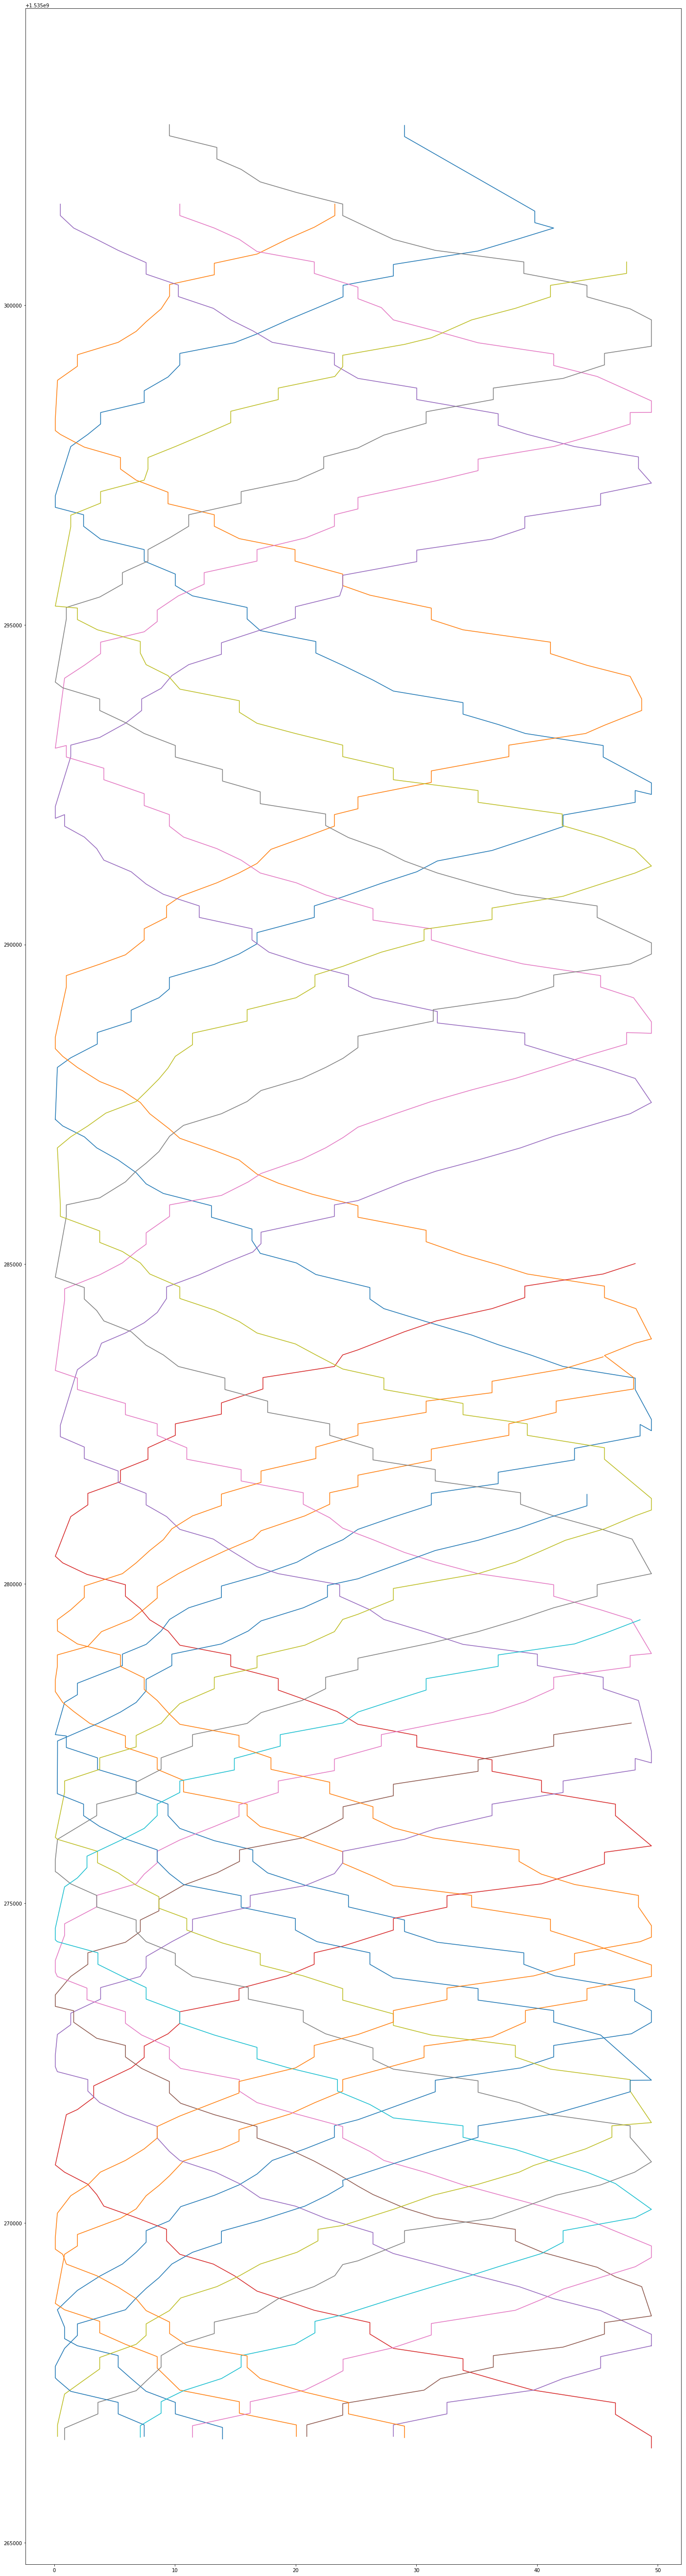

In [144]:
fig = plt.figure(figsize=[24,96])
ax = fig.add_subplot(111)
for i in range(401,413):
    reduced = df.loc[df['vehicle_id'] == i]
    ax.plot(reduced['distance'], reduced['timestamp'])